<a href="https://colab.research.google.com/github/Alex-Catalin21/ReteleNeuronale/blob/main/Proiect_RN_Dynamic_Duo_fara_Dropout.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
url = 'https://raw.githubusercontent.com/Alex-Catalin21/ReteleNeuronale/main/data_cancer.csv'
data = pd.read_csv(url)
del data['Unnamed: 32']


In [2]:
data.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [4]:
x = data.iloc[:, 2:].values
y = data.iloc[:, 1].values

# Encoding categorical data
from sklearn.preprocessing import LabelEncoder

labelencoder_X_1 = LabelEncoder()
y = labelencoder_X_1.fit_transform(y)

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=0)

# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [53]:
import keras
from keras import layers 
from keras import models 
network = models.Sequential()

In [54]:
# input layer and the first hidden layer
network.add(layers.Dense(16,activation='relu', input_dim=30))
# Adding dropout to prevent overfitting
#network.add(layers.Dropout(rate=0.1))

In [55]:
# Adding the second hidden layer
network.add(layers.Dense(16,activation='relu'))
# Adding dropout to prevent overfitting
#network.add(layers.Dropout(rate=0.1))

In [56]:
# Adding the output layer
network.add(layers.Dense(1, activation='sigmoid'))

In [57]:
X_train.shape, y_train.shape

((512, 30), (512,))

In [58]:
X_test.shape, y_test.shape

((57, 30), (57,))

In [59]:
# Compiling the ANN
network.compile(optimizer='adam', loss='binary_crossentropy',metrics=['accuracy'])

In [60]:
# Fitting the ANN to the Training set
network.fit(X_train, y_train, batch_size=100, epochs=100)
# The batch siez and number of epochs have been set using trial and error

Epoch 1/100
6/6 [==============================] - 0s 2ms/step - loss: 0.6021 - accuracy: 0.6738
Epoch 2/100
6/6 [==============================] - 0s 2ms/step - loss: 0.5243 - accuracy: 0.7930
Epoch 3/100
6/6 [==============================] - 0s 2ms/step - loss: 0.4660 - accuracy: 0.8438
Epoch 4/100
6/6 [==============================] - 0s 2ms/step - loss: 0.4186 - accuracy: 0.8711
Epoch 5/100
6/6 [==============================] - 0s 2ms/step - loss: 0.3804 - accuracy: 0.8887
Epoch 6/100
6/6 [==============================] - 0s 2ms/step - loss: 0.3481 - accuracy: 0.9062
Epoch 7/100
6/6 [==============================] - 0s 2ms/step - loss: 0.3206 - accuracy: 0.9160
Epoch 8/100
6/6 [==============================] - 0s 2ms/step - loss: 0.2965 - accuracy: 0.9199
Epoch 9/100
6/6 [==============================] - 0s 1ms/step - loss: 0.2755 - accuracy: 0.9258
Epoch 10/100
6/6 [==============================] - 0s 2ms/step - loss: 0.2575 - accuracy: 0.9277
Epoch 11/100
6/6 [===========

In [61]:
history = network.fit(X_train, y_train,
            validation_data=(X_test, y_test),
            epochs=100,batch_size=100)
# fixed history

Epoch 1/100
6/6 [==============================] - 0s 24ms/step - loss: 0.0397 - accuracy: 0.9922 - val_loss: 0.0433 - val_accuracy: 0.9825
Epoch 2/100
6/6 [==============================] - 0s 4ms/step - loss: 0.0394 - accuracy: 0.9922 - val_loss: 0.0429 - val_accuracy: 0.9825
Epoch 3/100
6/6 [==============================] - 0s 5ms/step - loss: 0.0391 - accuracy: 0.9922 - val_loss: 0.0427 - val_accuracy: 0.9825
Epoch 4/100
6/6 [==============================] - 0s 5ms/step - loss: 0.0387 - accuracy: 0.9922 - val_loss: 0.0428 - val_accuracy: 0.9825
Epoch 5/100
6/6 [==============================] - 0s 5ms/step - loss: 0.0384 - accuracy: 0.9922 - val_loss: 0.0428 - val_accuracy: 0.9825
Epoch 6/100
6/6 [==============================] - 0s 4ms/step - loss: 0.0381 - accuracy: 0.9922 - val_loss: 0.0432 - val_accuracy: 0.9825
Epoch 7/100
6/6 [==============================] - 0s 4ms/step - loss: 0.0376 - accuracy: 0.9922 - val_loss: 0.0438 - val_accuracy: 0.9825
Epoch 8/100
6/6 [=========

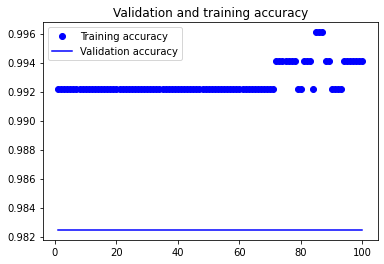

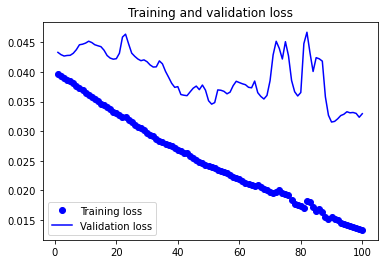

In [62]:
%matplotlib inline
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
# fixed accuracy at argument
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc)+1)

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label = 'Validation accuracy')
plt.title('Validation and training accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [63]:
# Predicting the Test set results
y_pred = network.predict(X_test)
y_pred = (y_pred > 0.5)

2/2 [==============================] - 0s 3ms/step


In [64]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [65]:
print("Our accuracy is {}%".format(((cm[0][0] + cm[1][1])/57)*100))

Our accuracy is 98.24561403508771%


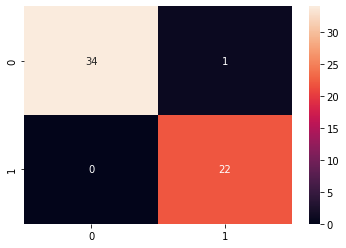

In [66]:
import seaborn as sns
sns.heatmap(cm,annot=True)